In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/train_cleaned.csv")

In [3]:
df.shape

(37623199, 33)

In [4]:
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.shape

(37623199, 32)

In my implementation, I will drop date_time, day_of_year_srch. I will only keep encoded_day_of_year_srch(target encoded day of the year)

In [6]:
df.drop(labels = ['day_of_year_srch'], axis = 1, inplace = True)
df.drop(labels = ['date_time'], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37623199 entries, 0 to 37623198
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   site_name                   float64
 1   user_location_country       float64
 2   user_location_region        float64
 3   user_location_city          float64
 4   is_package                  int64  
 5   channel                     float64
 6   srch_adults_cnt             int64  
 7   srch_children_cnt           int64  
 8   srch_rm_cnt                 int64  
 9   srch_destination_id         int64  
 10  is_booking                  int64  
 11  cnt                         float64
 12  hotel_continent             float64
 13  hotel_country               float64
 14  hotel_market                float64
 15  hotel_cluster               int64  
 16  imputed_distance            float64
 17  srch_before_ci              float64
 18  srch_trip_duration          float64
 19  encoded_day_of_year

In [8]:
Y = df.pop("is_booking")
X = df

In [9]:
X.info()
Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37623199 entries, 0 to 37623198
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   site_name                   float64
 1   user_location_country       float64
 2   user_location_region        float64
 3   user_location_city          float64
 4   is_package                  int64  
 5   channel                     float64
 6   srch_adults_cnt             int64  
 7   srch_children_cnt           int64  
 8   srch_rm_cnt                 int64  
 9   srch_destination_id         int64  
 10  cnt                         float64
 11  hotel_continent             float64
 12  hotel_country               float64
 13  hotel_market                float64
 14  hotel_cluster               int64  
 15  imputed_distance            float64
 16  srch_before_ci              float64
 17  srch_trip_duration          float64
 18  encoded_day_of_year_srch    float64
 19  srch_destination_ty

0           0
1           1
2           0
3           0
4           0
           ..
37623194    0
37623195    0
37623196    0
37623197    0
37623198    1
Name: is_booking, Length: 37623199, dtype: int64

In [10]:
destinations = pd.read_csv('data/destinations.csv')

In [11]:
destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [12]:
pca = PCA(n_components = 50)

In [13]:
features = destinations.iloc[:,1:]
features.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,-2.194008,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [14]:
feature_50 = pca.fit_transform(features)

In [15]:
feature_50 = pd.DataFrame(feature_50,columns = [f'd{i}' for i in range(1,51,1)])

In [16]:
feature_50

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50
0,-0.044268,0.169419,0.032522,-0.014270,-0.069690,-0.012316,-0.169846,0.173639,-0.201157,0.083299,...,-0.029465,0.015796,0.016345,-0.039136,-0.026335,-0.010037,-0.023488,0.020776,-0.068789,-0.055391
1,-0.440761,0.077405,-0.091572,-0.020231,0.013215,0.029690,-0.013465,0.007410,-0.031695,-0.028935,...,-0.003518,-0.000232,-0.030084,0.013470,-0.001429,0.030874,-0.015137,0.015058,0.019055,0.004885
2,0.001033,0.020677,0.012108,0.134135,0.142039,0.088821,-0.143663,0.089101,0.172445,-0.038046,...,-0.084585,0.022109,-0.069695,0.019578,0.013600,-0.035098,-0.029006,0.045559,-0.005527,-0.013706
3,-0.480467,-0.040345,-0.019320,-0.040099,-0.027393,0.017350,0.029531,0.033168,-0.026518,0.042454,...,-0.000450,0.012123,-0.006868,0.007586,-0.004801,0.001017,0.024114,0.007814,0.003673,-0.006671
4,-0.207253,-0.042694,-0.011744,-0.017520,-0.019871,-0.037969,-0.036659,-0.004192,-0.007662,0.010032,...,0.020481,0.008528,-0.002010,-0.009394,0.005558,0.018365,0.007746,-0.022827,0.009098,0.004331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,0.031398,-0.191479,-0.064768,0.091904,0.195067,0.085587,-0.157529,0.064376,0.088130,-0.114652,...,-0.056416,0.019794,-0.027326,0.026127,-0.010627,-0.008806,-0.116986,-0.007366,-0.083262,0.033459
62102,0.071925,-0.174147,0.071127,-0.056079,0.054286,0.037357,-0.038474,-0.258050,0.000854,-0.077014,...,-0.008066,0.045955,0.043369,-0.011092,-0.073675,0.065055,-0.025177,-0.029864,0.023926,-0.011034
62103,0.166190,0.208037,0.217181,-0.006594,0.118131,-0.014778,-0.058268,-0.203252,0.000177,-0.074810,...,0.008503,0.031362,0.019728,0.039901,0.011513,0.011983,0.011489,0.019166,0.041711,0.025163
62104,-0.581395,-0.027664,-0.054205,-0.041478,0.007024,0.056484,0.048411,0.023424,0.017608,0.020818,...,-0.007946,-0.002815,0.006491,-0.005008,-0.001735,0.009253,-0.003845,-0.001804,-0.002239,0.000150


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

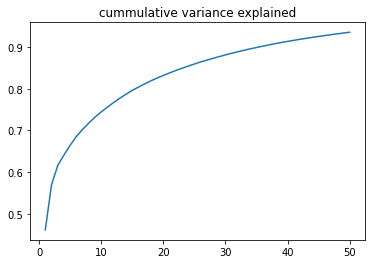

In [16]:
ratios = pca.explained_variance_ratio_
cum_ratio = np.zeros(len(ratios))
for i in range(len(ratios)):
    if i == 0:
        cum_ratio[i] = ratios[i]
        continue
    cum_ratio[i] = cum_ratio[i - 1] + ratios[i]
component_num = np.arange(1, len(ratios)+1)
fig, ax = plt.subplots()
sns.lineplot(x = component_num, y = cum_ratio, ax = ax);
ax.set_title("cummulative variance explained");

The first 50 features already explained most of the variability. We will just use these first 50 features

In [17]:
feature_50.insert(0, "srch_destination_id", destinations.srch_destination_id)
feature_50

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50
0,0,-0.044268,0.169419,0.032522,-0.014270,-0.069690,-0.012316,-0.169846,0.173639,-0.201157,...,-0.029465,0.015796,0.016345,-0.039136,-0.026335,-0.010037,-0.023488,0.020776,-0.068789,-0.055391
1,1,-0.440761,0.077405,-0.091572,-0.020231,0.013215,0.029690,-0.013465,0.007410,-0.031695,...,-0.003518,-0.000232,-0.030084,0.013470,-0.001429,0.030874,-0.015137,0.015058,0.019055,0.004885
2,2,0.001033,0.020677,0.012108,0.134135,0.142039,0.088821,-0.143663,0.089101,0.172445,...,-0.084585,0.022109,-0.069695,0.019578,0.013600,-0.035098,-0.029006,0.045559,-0.005527,-0.013706
3,3,-0.480467,-0.040345,-0.019320,-0.040099,-0.027393,0.017350,0.029531,0.033168,-0.026518,...,-0.000450,0.012123,-0.006868,0.007586,-0.004801,0.001017,0.024114,0.007814,0.003673,-0.006671
4,4,-0.207253,-0.042694,-0.011744,-0.017520,-0.019871,-0.037969,-0.036659,-0.004192,-0.007662,...,0.020481,0.008528,-0.002010,-0.009394,0.005558,0.018365,0.007746,-0.022827,0.009098,0.004331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,0.031398,-0.191479,-0.064768,0.091904,0.195067,0.085587,-0.157529,0.064376,0.088130,...,-0.056416,0.019794,-0.027326,0.026127,-0.010627,-0.008806,-0.116986,-0.007366,-0.083262,0.033459
62102,64990,0.071925,-0.174147,0.071127,-0.056079,0.054286,0.037357,-0.038474,-0.258050,0.000854,...,-0.008066,0.045955,0.043369,-0.011092,-0.073675,0.065055,-0.025177,-0.029864,0.023926,-0.011034
62103,64991,0.166190,0.208037,0.217181,-0.006594,0.118131,-0.014778,-0.058268,-0.203252,0.000177,...,0.008503,0.031362,0.019728,0.039901,0.011513,0.011983,0.011489,0.019166,0.041711,0.025163
62104,64992,-0.581395,-0.027664,-0.054205,-0.041478,0.007024,0.056484,0.048411,0.023424,0.017608,...,-0.007946,-0.002815,0.006491,-0.005008,-0.001735,0.009253,-0.003845,-0.001804,-0.002239,0.000150


In [25]:
X.to_csv('X.csv')
Y.to_csv('Y.csv')
feature_50.to_csv('feature_50.csv')

join the training data and destinations

In [21]:
X = pd.read_csv('data/X.csv', index_col = 0)

In [22]:
display(X.head())
display(X.shape)
display(X.columns)

,site_name,user_location_country,user_location_region,user_location_city,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,...,srch_destination_type_id_0,srch_destination_type_id_1,srch_destination_type_id_2,srch_destination_type_id_3,srch_destination_type_id_4,srch_destination_type_id_5,srch_destination_type_id_6,srch_destination_type_id_7,srch_destination_type_id_8,srch_destination_type_id_9
0,0.082752,0.082413,0.069950,0.080693,1,0.084775,2,0,1,8250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.082752,0.082413,0.069950,0.080693,1,0.084775,2,0,1,8250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.082752,0.082413,0.069950,0.080693,0,0.084775,2,0,1,8250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.082752,0.082413,0.088094,0.086438,0,0.056664,2,0,1,14984,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082752,0.082413,0.088094,0.086438,0,0.056664,2,0,1,14984,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(37623199, 29)

Index(['site_name', 'user_location_country', 'user_location_region',
       'user_location_city', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'imputed_distance', 'srch_before_ci', 'srch_trip_duration',
       'encoded_day_of_year_srch', 'srch_destination_type_id_0',
       'srch_destination_type_id_1', 'srch_destination_type_id_2',
       'srch_destination_type_id_3', 'srch_destination_type_id_4',
       'srch_destination_type_id_5', 'srch_destination_type_id_6',
       'srch_destination_type_id_7', 'srch_destination_type_id_8',
       'srch_destination_type_id_9'],
      dtype='object')

In [23]:
Y = pd.read_csv('data/Y.csv', index_col = 0)

In [24]:
Y

,is_booking
0,0
1,1
2,0
3,0
4,0
...,...
37623194,0
37623195,0
37623196,0
37623197,0


In [25]:
feature_50 = pd.read_csv('data/feature_50.csv', index_col = 0)

In [26]:
feature_50

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50
0,0,-0.044268,0.169419,0.032522,-0.014270,-0.069690,-0.012316,-0.169846,0.173639,-0.201157,...,-0.029465,0.015796,0.016345,-0.039136,-0.026335,-0.010037,-0.023488,0.020776,-0.068789,-0.055391
1,1,-0.440761,0.077405,-0.091572,-0.020231,0.013215,0.029690,-0.013465,0.007410,-0.031695,...,-0.003518,-0.000232,-0.030084,0.013470,-0.001429,0.030874,-0.015137,0.015058,0.019055,0.004885
2,2,0.001033,0.020677,0.012108,0.134135,0.142039,0.088821,-0.143663,0.089101,0.172445,...,-0.084585,0.022109,-0.069695,0.019578,0.013600,-0.035098,-0.029006,0.045559,-0.005527,-0.013706
3,3,-0.480467,-0.040345,-0.019320,-0.040099,-0.027393,0.017350,0.029531,0.033168,-0.026518,...,-0.000450,0.012123,-0.006868,0.007586,-0.004801,0.001017,0.024114,0.007814,0.003673,-0.006671
4,4,-0.207253,-0.042694,-0.011744,-0.017520,-0.019871,-0.037969,-0.036659,-0.004192,-0.007662,...,0.020481,0.008528,-0.002010,-0.009394,0.005558,0.018365,0.007746,-0.022827,0.009098,0.004331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,0.031398,-0.191479,-0.064768,0.091904,0.195067,0.085587,-0.157529,0.064376,0.088130,...,-0.056416,0.019794,-0.027326,0.026127,-0.010627,-0.008806,-0.116986,-0.007366,-0.083262,0.033459
62102,64990,0.071925,-0.174147,0.071127,-0.056079,0.054286,0.037357,-0.038474,-0.258050,0.000854,...,-0.008066,0.045955,0.043369,-0.011092,-0.073675,0.065055,-0.025177,-0.029864,0.023926,-0.011034
62103,64991,0.166190,0.208037,0.217181,-0.006594,0.118131,-0.014778,-0.058268,-0.203252,0.000177,...,0.008503,0.031362,0.019728,0.039901,0.011513,0.011983,0.011489,0.019166,0.041711,0.025163
62104,64992,-0.581395,-0.027664,-0.054205,-0.041478,0.007024,0.056484,0.048411,0.023424,0.017608,...,-0.007946,-0.002815,0.006491,-0.005008,-0.001735,0.009253,-0.003845,-0.001804,-0.002239,0.000150


In [27]:
joined_df = X.merge(feature_50, how = 'left',on = 'srch_destination_id')

In [28]:
joined_df.columns

Index(['site_name', 'user_location_country', 'user_location_region',
       'user_location_city', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'imputed_distance', 'srch_before_ci', 'srch_trip_duration',
       'encoded_day_of_year_srch', 'srch_destination_type_id_0',
       'srch_destination_type_id_1', 'srch_destination_type_id_2',
       'srch_destination_type_id_3', 'srch_destination_type_id_4',
       'srch_destination_type_id_5', 'srch_destination_type_id_6',
       'srch_destination_type_id_7', 'srch_destination_type_id_8',
       'srch_destination_type_id_9', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7',
       'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17',
       'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27',
       'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37',
 

In [29]:
joined_df.shape

(37623199, 79)

In [30]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(joined_df, Y, test_size = 0.2, random_state = 42, stratify = Y)